In [1]:
def bispecplot(btype,bn=20,s=1e9,n=2,c=['r','b','g']):

    print('plotting '+btype)

    fig = subplots(figsize=[10,7])
    ax0 = subplot2grid((5,1),(0,0),rowspan=2)
    ax1 = subplot2grid((5,1),(2,0))
    ax2 = subplot2grid((5,1),(4,0))
    ax1.axhline(0.,ls='--',color='k')
    ax2.axhline(0.,ls='--',color='k')

    if btype == 'equi': 
        m0 = 1
        ax0.set_ylabel(r'$10^9 \ell^2b_{\ell\ell\ell}$')
        ax0.set_ylim(.15,.7)
        ax1.set_ylim(-.29,.29)

    if btype == 'fold': 
        m0 = 2
        ax0.set_ylabel(r'$10^9 \ell^2b_{\ell,\ell/2,\ell/2}$')
        ax0.set_ylim(-.3,1.4)
        ax1.set_ylim(-.3,.3)

    if btype == 'sque': 
        m0 = 3
        ax0.set_ylabel(r'$10^9 \ell^2b_{\ell_0,\ell,\ell}$')
        ax0.set_ylim(0,7)
        ax1.set_ylim(-.48,0)

    if btype == 'angl': 
        m0 = 4
        ax0.set_ylabel(r'$10^9 \ell^2b_{\ell,\ell_h,\ell_h}$')
        ax0.set_ylim(-.03,.5)
        ax1.set_ylim(-.5,.5)

    ax1.set_ylabel(r'$\Delta b/b$')
    ax2.set_ylabel(r'$\Delta b/\sigma$')

    d1 = '/global/homes/t/toshiyan/Work/Ongoing/allsky/data/fullsky/bisp/'+btype+'/'
    d2 = '/global/homes/t/toshiyan/Work/Ongoing/bisp/data/modelw/bl/'

    ax2.set_xlabel(r'multipole $\ell$',fontsize=20)
    ax0.set_xlim(1,2048)
    ax0.set_xticklabels([])
    ax1.set_xlim(1,2048)
    ax1.set_xticklabels([])
    ax2.set_xlim(1,2048)
    ax2.set_ylim(-5,5)

    # binned spectrum
    b, Bb0, pb0 = np.loadtxt(d2+'bl_GM_b'+str(bn)+'.dat',unpack=True,usecols=(0,m0,m0+4))
    b, Bb1, pb1 = np.loadtxt(d2+'bl_SC_b'+str(bn)+'.dat',unpack=True,usecols=(0,m0,m0+4))
    b, Bb2, pb2 = np.loadtxt(d2+'bl_RT_b'+str(bn)+'.dat',unpack=True,usecols=(0,m0,m0+4))
    ax0.plot(b,b**n*s*(Bb0+pb0),'r-',label='GM')
    ax0.plot(b,b**n*s*(Bb1+pb1),'b-',label='SC')
    ax0.plot(b,b**n*s*(Bb2+pb2),'g-',label='RT')

    # full sim
    b, sbl, vbl = np.loadtxt(d1+'mbisp_nkap13_ns2048_oL1-2048_b'+str(bn)+'.dat',unpack=True,usecols=(0,1,2))
    vbl = vbl/108**0.5
    ax0.errorbar(b,b**n*s*sbl,yerr=b**n*s*vbl,fmt='o',color='k')

    # ratio
    b, spb, vpb = np.loadtxt(d1+'mbisp_Gkap12_ns2048_oL1-2048_b'+str(bn)+'.dat',unpack=True,usecols=(0,1,2))
    ax1.errorbar(b,(sbl-Bb0-pb0)/Bb0,yerr=vbl/(Bb0),fmt='o',color=c[0])
    ax1.errorbar(b,(sbl-Bb1-pb1)/Bb1,yerr=vbl/(Bb1),fmt='o',color=c[1])
    ax1.errorbar(b,(sbl-Bb2-pb2)/Bb2,yerr=vbl/(Bb2),fmt='o',color=c[2])
    ax1.axhline(y=.1,color='k',linestyle='--',lw=.5)
    ax1.axhline(y=-.1,color='k',linestyle='--',lw=.5)

    # diff
    ax2.errorbar(b,(sbl-Bb0-pb0)/vbl,yerr=vbl/vbl,fmt='o',color=c[0])
    ax2.errorbar(b,(sbl-Bb1-pb1)/vbl,yerr=vbl/vbl,fmt='o',color=c[1])
    ax2.errorbar(b,(sbl-Bb2-pb2)/vbl,yerr=vbl/vbl,fmt='o',color=c[2])

    ax0.legend(loc=0,frameon=False)
    subplots_adjust(bottom=0.1,right=0.75,top=0.9,wspace=0,hspace=0)
    #savefig('fig_bl_'+btype+'_b'+str(bn)+'.png',bbox_inches='tight')
    show()
    clf()

In [2]:
import numpy as np, matplotlib as mpl
from matplotlib.pyplot import *
mpl.rc('text',usetex=True)
mpl.rcParams.update({'font.size': 16,'legend.fontsize':12,'font.family':'sans','font.style':'normal'})

plotting equi


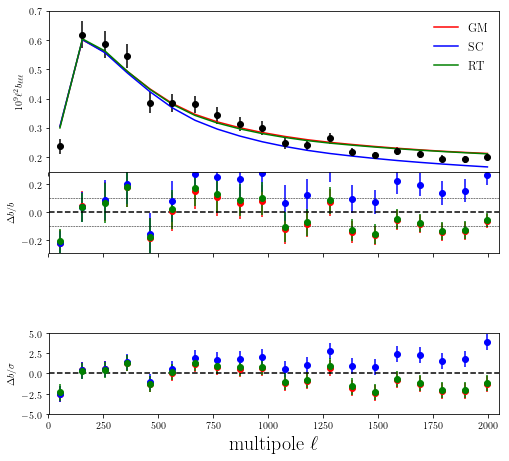

plotting fold


<Figure size 432x288 with 0 Axes>

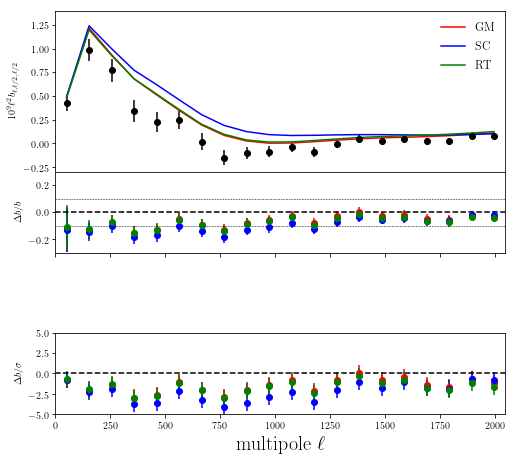

plotting sque


<Figure size 432x288 with 0 Axes>

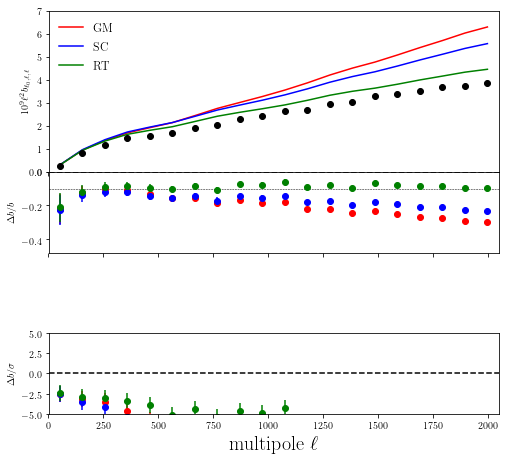

plotting angl


<Figure size 432x288 with 0 Axes>

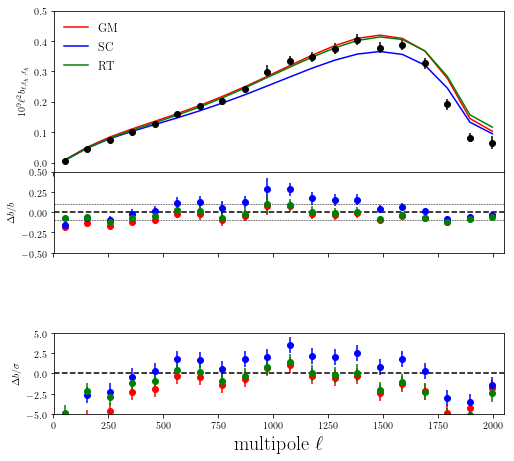

<Figure size 432x288 with 0 Axes>

In [3]:
bn = 20
#btype = 'equi'
#btype = 'fold'
#btype = 'sque'
#btype = 'angl'
#bispecplot(btype,bn)
for btype in ['equi','fold','sque','angl']: 
    bispecplot(btype,bn)